# Investigating Mobile App Store Data

## I. Introduction

In order to gain improved domain knowledge of the mobile app space, the data set of the most frequently rated mobile apps from the appstore in 2017 will be analyzed. We can answer such questions as:


* Which are the most popular apps in terms of total user ratings?
* Which genres have higher average user ratings, the most total ratings?
* Which metrics does the price of an app affect? Are free apps higher rated than paid apps?
* Which variables have the highest correlation with total number of user ratings?

Two metrics that mobile app developers would want to maximize would be: user rating, in a scale from 1-5 we want this be as close to 5 as possible. We would also want to maximize the total number of ratings as the more ratings there are the more credible it is, and the more downloads the app should receive.

Source of data: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps

## Getting Started: Loading the data

The data set consists of two csv files one 'AppleStore.csv' contains the metrics of each apps such as average user ratings, prime genre, and price. Whereas 'appleStore_description.csv' contains the description of each app. In this study we will mostly be looking at 'AppleStore.csv' and loading into a variable called `store`.

In [294]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

os.listdir('./data/')

['AppleStore.csv', 'appleStore_description.csv']

In [295]:
store = pd.read_csv('./data/AppleStore.csv')
description = pd.read_csv('./data/appleStore_description.csv')

In [296]:
store=store.drop(['Unnamed: 0','currency'],axis=1,errors='ignore')
print("Data set shape:", store.shape)
display(store.head())

Data set shape: (7197, 15)


,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [297]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 15 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 843.5+ KB


In [298]:
store.drop('id',axis=1).describe()

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


Some things that can be gleaned from the above is that there are 7197 apps in the dataset, with 15 features. The average price of the apps are around $1.70 with most of the apps being free. For ratings the average is 300 total ratings. Average user rating is at 3.5. There were also 41 apps with 0 as their `lang.num` value, these could be changed to 1 as all apps should have at least one language supported, however I did see apps in the store listed with no languages so these be left alone since this is how users see the app in the store.

**Question 1:** Which are the most popular apps in terms of total user ratings?

In [434]:
sorted_by_rating=store[['track_name','prime_genre','user_rating','rating_count_tot']].sort_values(by=['rating_count_tot','user_rating'],ascending=False)
display(sorted_by_rating.head(10))
top10=sorted_by_rating.iloc[:10,:]
print("Percent of total rating counts from the top 10 most popular apps:".upper(),
      int(round(top10.rating_count_tot.sum() / store.rating_count_tot.sum(),2) * 100),"%")

,track_name,prime_genre,user_rating,rating_count_tot
16,Facebook,Social Networking,3.5,2974676
519,Instagram,Photo & Video,4.5,2161558
1346,Clash of Clans,Games,4.5,2130805
707,Temple Run,Games,4.5,1724546
7,Pandora - Music & Radio,Music,4.0,1126879
755,Pinterest,Social Networking,4.5,1061624
4,Bible,Reference,4.5,985920
1493,Candy Crush Saga,Games,4.5,961794
178,Spotify Music,Music,4.5,878563
275,Angry Birds,Games,4.5,824451


PERCENT OF TOTAL RATING COUNTS FROM THE TOP 10 MOST POPULAR APPS: 16 %


The top 10 most popular apps are: **Facebook, Instagram, Clash of Clans, Temple Run, Pandora, Pinterest, Bible, Candy Crush, Spotify, and Angry Birds.**

The genres of the top 10 most rated apps are Social Networking, Photo & Video, Games, Music, Social Networking and Reference. Games appear 4 times in the top 10, social networking and music each appear twice. It would appear that If I wanted to increase the chances of making a popular app, it should be in one of these genres.

,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
size_bytes,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614,-0.150418
price,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713,-0.029942
rating_count_tot,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675,-0.000982
rating_count_ver,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287,0.006460
user_rating,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976,0.069816
user_rating_ver,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580,0.050094
sup_devices.num,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681,-0.037109
ipadSc_urls.num,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378,0.071901
lang.num,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000,0.032477
vpp_lic,-0.150418,-0.029942,-0.000982,0.006460,0.069816,0.050094,-0.037109,0.071901,0.032477,1.000000


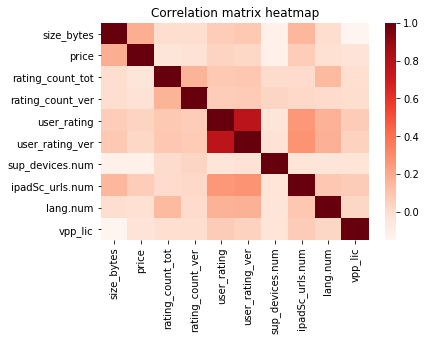

In [299]:
import seaborn as sns

display(store.drop('id',axis=1).corr())
sns.heatmap(data=store.drop('id',axis=1).corr(),cmap='Reds')
plt.title('Correlation matrix heatmap')
plt.show();

We can infer from the distributions of average user rating, that user ratings do skew more positive or higher with over 75% of apps having average rating greater than or equal to 3.5 and 50% over 4.0. There is also a significant number of apps (13%) with no ratings. There also appears to be relatively low variance in these ratings as such I would claim that total ratings to be a more insightful/important metric for the success of an app.

In [300]:
print("Average Ratings")
averages = []
for g in store.prime_genre.unique():
    avg = round(np.mean(store[store.prime_genre==g].user_rating),2)
    averages.append((g, avg))
avg_ratings_genre=pd.DataFrame(averages, columns=['genre','average rating']).sort_values(by='average rating',ascending=False).reset_index(drop=True)
avg_ratings_genre

Average Ratings


,genre,average rating
0,Productivity,4.01
1,Music,3.98
2,Photo & Video,3.80
3,Business,3.75
4,Health & Fitness,3.70
5,Games,3.69
6,Weather,3.60
7,Shopping,3.54
8,Reference,3.45
9,Travel,3.38


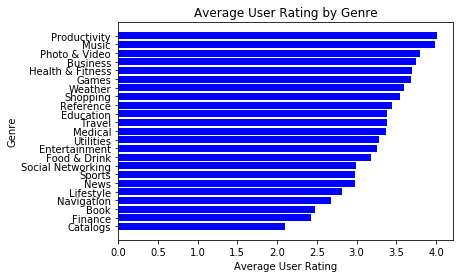

In [301]:
import matplotlib.pyplot as plt
%matplotlib inline
avg_ratings_genre=avg_ratings_genre.sort_values(by='average rating',ascending=True).reset_index(drop=True)
plt.barh(y=avg_ratings_genre['genre'],width=avg_ratings_genre['average rating'],
        color='blue')
plt.xlabel('Average User Rating')
plt.ylabel('Genre')
plt.title('Average User Rating by Genre')

plt.show()

As can be seen in the above data frame and bar graph, the apps with the highest average ratings were **Productivity, Music, Photo & Video Apps.** While the genres with the lowest average ratings were **Catalogs, Finance, and Book.**

**Creating a new feature: `weighted user rating`** 

In [302]:
display(store[['user_rating', 'rating_count_tot']].head())
display(store[['user_rating_ver', 'rating_count_ver']].head())

def weighted_average(x,n,data):
    w_avg = {}
    for g in store.prime_genre.unique():
        f = data.prime_genre==g # change this to: filter = data.prime_genre == g => data[filter]
        #print("Denominator for:", g, data[f][n].sum())
        if data[f][n].sum() == 0:
            w_avg[g] = 0
        else:
            w_avg[g] = round((data[f][x] * data[f][n]).sum() / data[f][n].sum(), 2)
    return w_avg
w_avg_tot=weighted_average(x='user_rating', n='rating_count_tot', data=store)
w_avg_ver=weighted_average(x='user_rating_ver', n='rating_count_ver', data=store)
w_avg_df=pd.DataFrame({'w_avg_tot':w_avg_tot, 'w_avg_ver':w_avg_ver})
display(w_avg_df)

,user_rating,rating_count_tot
0,4.0,21292
1,4.0,161065
2,3.5,188583
3,4.0,262241
4,4.5,985920


,user_rating_ver,rating_count_ver
0,4.5,26
1,3.5,26
2,4.5,2822
3,4.5,649
4,5.0,5320


,w_avg_tot,w_avg_ver
Book,4.07,4.52
Business,4.35,4.73
Catalogs,4.80,4.90
Education,4.21,3.42
Entertainment,3.83,4.16
Finance,4.13,4.46
Food & Drink,4.47,4.65
Games,4.44,4.49
Health & Fitness,4.25,4.71
Lifestyle,4.17,4.44


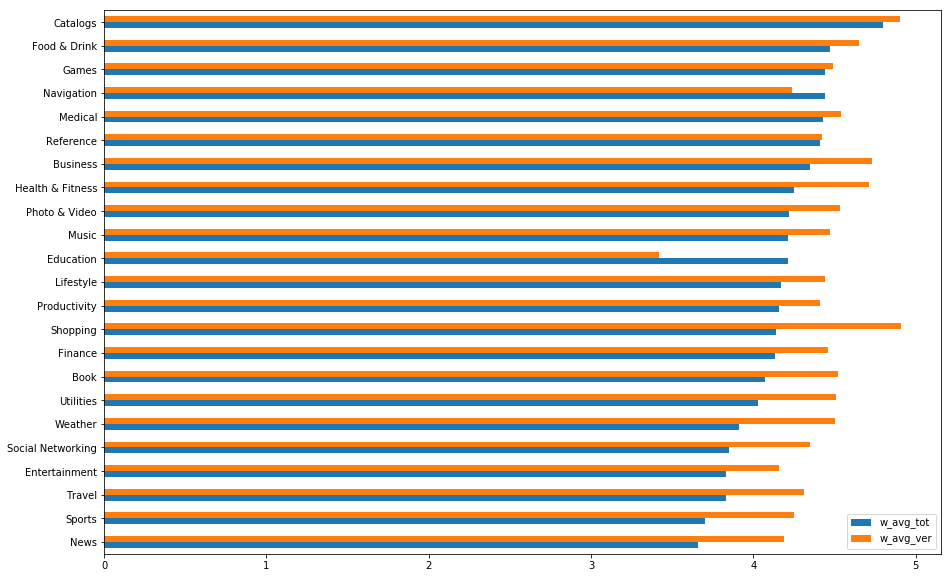

In [303]:
w_avg_df.sort_values(by='w_avg_tot').plot.barh(figsize=(15,10))
plt.show()

Sorting the bar graph by the weighted user rating(taking into account number of user ratings per app) it can be seen that **Catalogs, Food & Drink, and Games** had the highest rating.

Which are the most successful apps? While we do not have a number of downloads column, we do have total ratings which gives us an idea of the popularity of the app since users must have downloaded the app to leave a rating. We sort each app by `rating_count_tot` and then by `user_rating`.

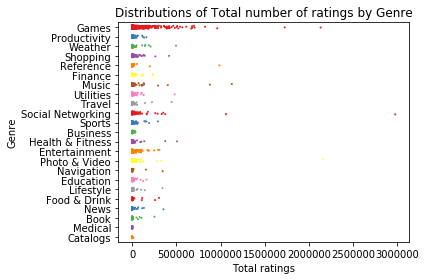

In [421]:
sns.stripplot(y='prime_genre', x='rating_count_tot', data=store, orient='h',
             jitter=0.15, palette="Set1", size=2)
plt.xlabel('Total ratings'); plt.ylabel('Genre'); plt.title('Distributions of Total number of ratings by Genre')
plt.tight_layout()
plt.show()

In [305]:
genre_tot_ratings=store[['prime_genre','rating_count_tot']].groupby(by='prime_genre').mean().round(2)
top_genres=genre_tot_ratings.sort_values(by='rating_count_tot',ascending=False).head(10)
top_genres

,rating_count_tot
prime_genre,
Social Networking,45498.90
Music,28842.02
Reference,22410.84
Weather,22181.03
Shopping,18615.33
Photo & Video,14352.28
Travel,14129.44
Sports,14026.93
Food & Drink,13938.62


### Which factors lead to more total ratings?

If I wanted to maximize total ratings how would I begin to do so? One obvious insight drawn from the above correlation matrix heat map, was that `rating_count_tot` had a correlation score of 0.14 with `lang.num` (number of languages supported) which makes intuitive sense since the more languages supported, theoretically the more people are able to use the app and thus leave a rating.

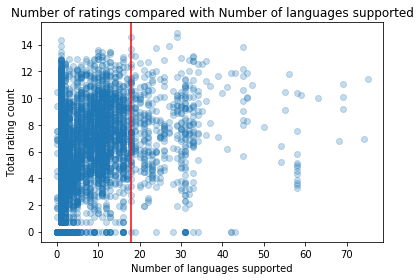

0.14

In [309]:
total_ratings = store['rating_count_tot']
n_lang = store['lang.num']
plt.scatter(n_lang,total_ratings.apply(lambda x: np.log(x + 1)),alpha=0.25)
plt.ylabel('Total rating count')
plt.xlabel('Number of languages supported')
plt.title('Number of ratings compared with Number of languages supported')
plt.axvline(x=18, color='r')
plt.tight_layout()
plt.show()
round(np.corrcoef(total_ratings,n_lang)[0][1],2)

Comparing `lang.num` with `rating_count_tot` it can be seen the majority of the data points lie to the left of 20, this cluster area is bounded by the red line. This area of the graph is very dense and even with an alpha factor it can be difficult to make out the trend in the overlapping points.

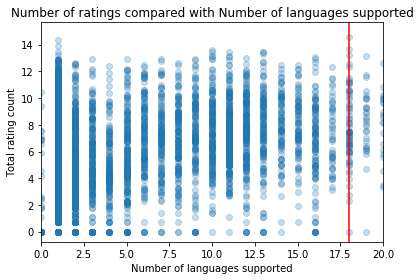

In [372]:
total_ratings = store['rating_count_tot']
n_lang = store['lang.num']
plt.scatter(n_lang,total_ratings.apply(lambda x: np.log(x + 1)),alpha=0.25)
plt.ylabel('Total rating count')
plt.xlabel('Number of languages supported')
plt.title('Number of ratings compared with Number of languages supported')
plt.axvline(x=18, color='r')
plt.xlim(0,20)
plt.tight_layout()
plt.show()

Zooming in we can see the discrete nature of the variable clearly. As the number of languages supported increases, the average of the points seems to increase as well going by how the cluster of points seems to also go up along the y-axis.

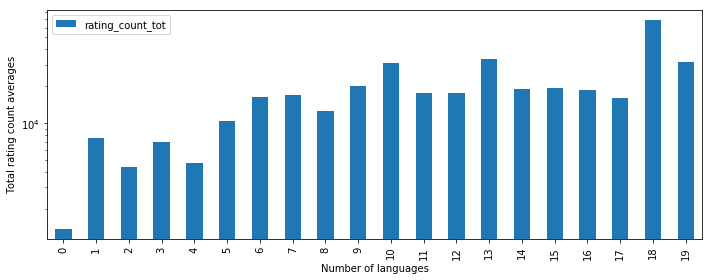

In [410]:
grouped=store[['lang.num','rating_count_tot']].groupby('lang.num')
grouped.agg(np.mean).loc[:19,].plot(kind='bar',logy=True,figsize=(10,4))
plt.ylabel('Total rating count averages');plt.xlabel('Number of languages')
plt.tight_layout()
plt.show()

In [415]:
cm = sns.light_palette("blue", as_cmap=True)
top20=grouped.agg(np.mean).loc[:19,].round(2)
top20.style.background_gradient(cmap=cm)

,rating_count_tot
lang.num,
0,1384
1,7507
2,4434.64
3,7014.33
4,4712.51
5,10378.7
6,16177.6
7,16797.5
8,12612.5


In [419]:
len(store[store['lang.num'] == 0])

41

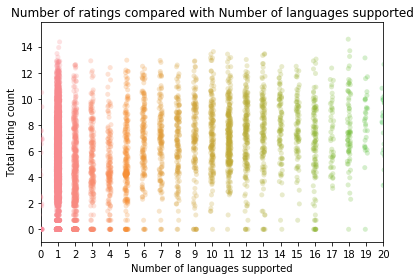

In [312]:
total_ratings = store['rating_count_tot']
n_lang = store['lang.num']
sns.stripplot(n_lang,total_ratings.apply(lambda x: np.log(x + 1)),
              alpha=0.25,jitter=True)
plt.ylabel('Total rating count')
plt.xlabel('Number of languages supported')
plt.title('Number of ratings compared with Number of languages supported')
plt.xlim(0,20)
plt.tight_layout()
plt.show()

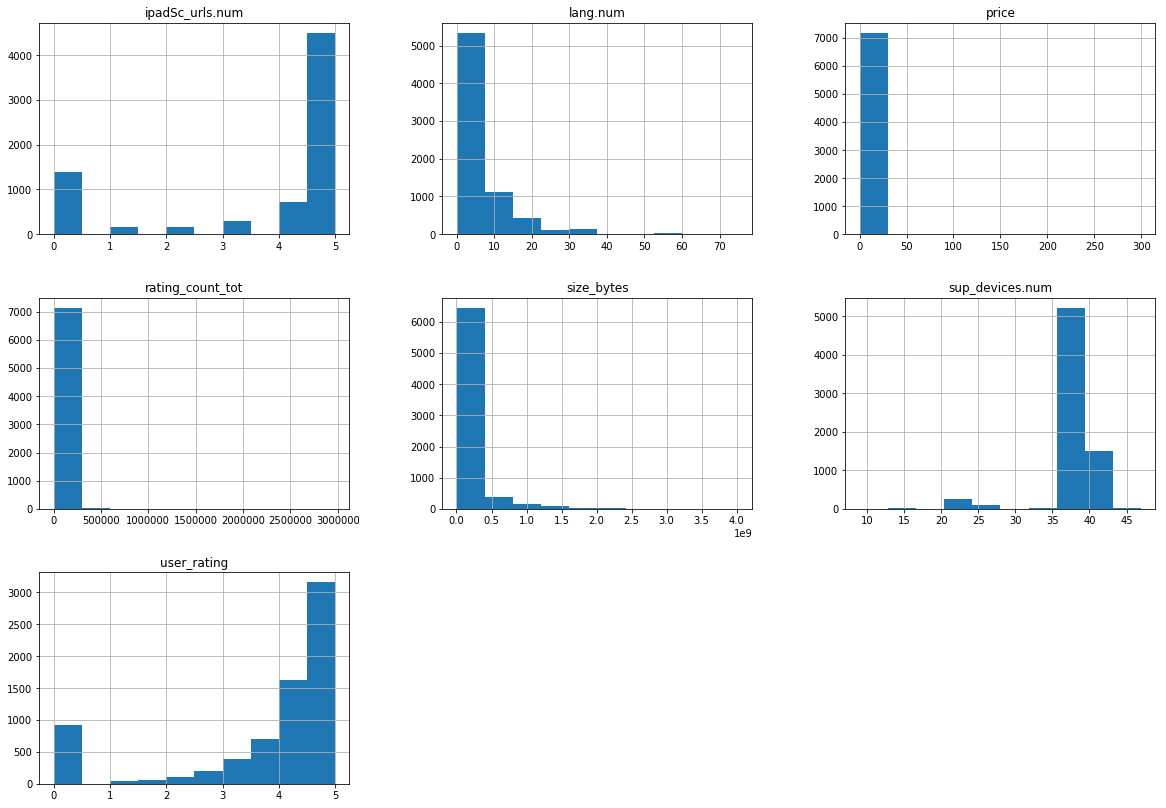

In [313]:
target = ['rating_count_tot']
numeric = ['size_bytes','price','user_rating',
           'sup_devices.num','ipadSc_urls.num','lang.num']
non_numeric = ['cont_rating','prime_genre','vpp_lic']
features = numeric + non_numeric

# Detect skewed data
store[target + numeric].hist(figsize=(20,14),xlabelsize=10);

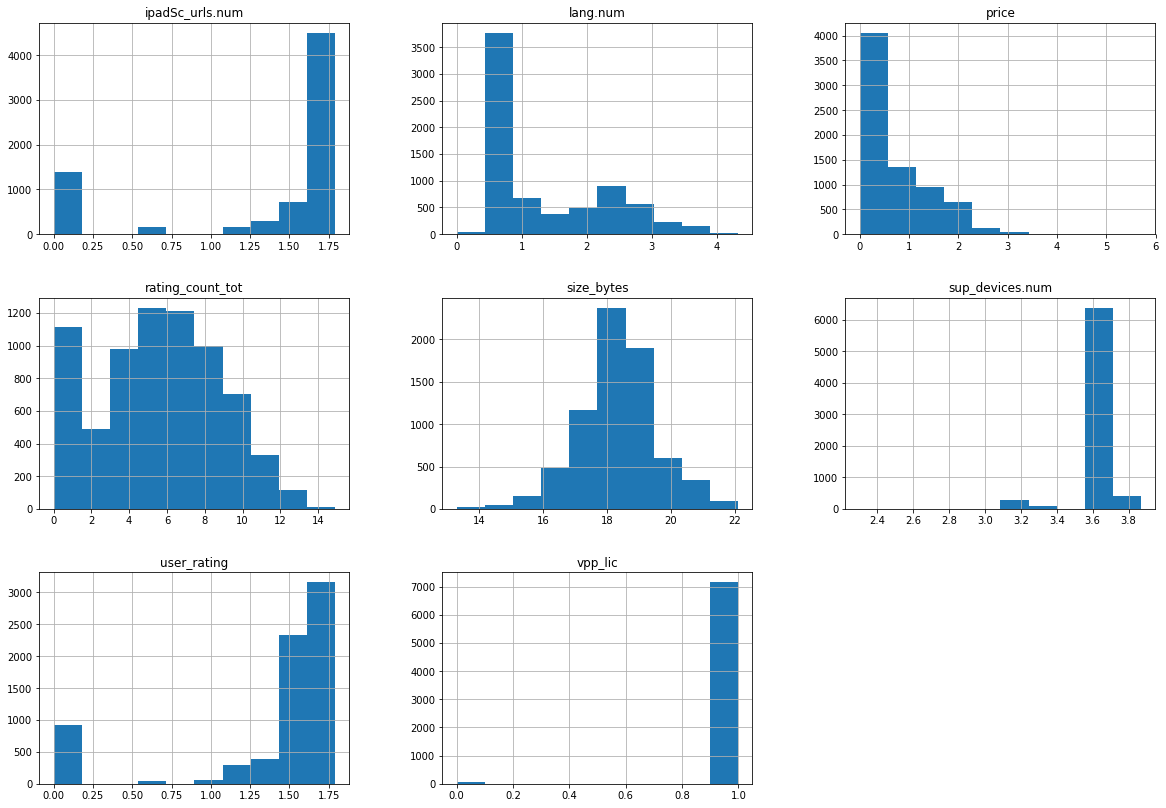

In [314]:
log_store = store.loc[:, target + features]
log_store[target + numeric] = np.log(store[target + numeric] + 1)

log_store.hist(figsize=(20,14),xlabelsize=10);

plt.show()

In [315]:
log_store

,rating_count_tot,size_bytes,price,user_rating,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,vpp_lic
0,9.966134,18.428532,1.607436,1.609438,3.663562,1.791759,2.397895,4+,Games,1
1,11.989569,18.881761,0.000000,1.609438,3.637586,1.791759,3.178054,4+,Productivity,1
2,12.147299,18.425907,0.000000,1.504077,3.637586,1.791759,1.386294,4+,Weather,1
3,12.477023,18.671533,0.000000,1.609438,3.637586,1.791759,2.302585,12+,Shopping,1
4,13.801332,18.345681,0.000000,1.704748,3.637586,1.791759,3.828641,4+,Reference,1
5,9.018453,16.165524,0.688135,1.609438,3.871201,1.791759,0.693147,4+,Games,1
6,11.690971,19.243961,0.000000,1.609438,3.637586,0.000000,2.995732,4+,Finance,1
7,13.934963,18.684909,0.000000,1.609438,3.637586,1.609438,0.693147,12+,Music,1
8,7.019297,17.712426,2.396986,1.704748,3.637586,1.791759,0.693147,4+,Utilities,1
9,8.972844,18.064337,1.607436,1.609438,3.663562,0.000000,2.397895,4+,Games,1


### Data preprocessing

In [316]:
list(pd.get_dummies(log_store[non_numeric]).columns)

['vpp_lic',
 'cont_rating_12+',
 'cont_rating_17+',
 'cont_rating_4+',
 'cont_rating_9+',
 'prime_genre_Book',
 'prime_genre_Business',
 'prime_genre_Catalogs',
 'prime_genre_Education',
 'prime_genre_Entertainment',
 'prime_genre_Finance',
 'prime_genre_Food & Drink',
 'prime_genre_Games',
 'prime_genre_Health & Fitness',
 'prime_genre_Lifestyle',
 'prime_genre_Medical',
 'prime_genre_Music',
 'prime_genre_Navigation',
 'prime_genre_News',
 'prime_genre_Photo & Video',
 'prime_genre_Productivity',
 'prime_genre_Reference',
 'prime_genre_Shopping',
 'prime_genre_Social Networking',
 'prime_genre_Sports',
 'prime_genre_Travel',
 'prime_genre_Utilities',
 'prime_genre_Weather']

In [317]:
#from sklearn.preprocessing import MinMaxScaler

target = ['rating_count_tot']
numeric = ['size_bytes','price','user_rating',
           'sup_devices.num','ipadSc_urls.num','lang.num']
non_numeric = ['cont_rating','prime_genre','vpp_lic']

df = log_store.loc[:,target + numeric + non_numeric]

# Outlier detection
if True:
    for feat in target + numeric:
        q75, q25 = np.percentile(df[feat],[75,25])
        iqr = q75 - q25

        lower = q25 - (iqr*1.5)
        upper = q75 + (iqr*1.5)
        outliers = list(filter(lambda x: (x < q25) or (x > q75),df[feat]))
        print(feat.upper(), "outliers:\n", len(outliers))

#scaler = MinMaxScaler()

#df[target + numeric] = scaler.fit_transform(df[target + numeric])
df[target + numeric] = (log_store[target + numeric] - np.mean(log_store[target + numeric]) / np.std(log_store[target + numeric]))


df.head()

RATING_COUNT_TOT outliers:
 3596
SIZE_BYTES outliers:
 3598
PRICE outliers:
 1792
USER_RATING outliers:
 2206
SUP_DEVICES.NUM outliers:
 2022
IPADSC_URLS.NUM outliers:
 1698
LANG.NUM outliers:
 1756


,rating_count_tot,size_bytes,price,user_rating,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating,prime_genre,vpp_lic
0,8.291216,3.459933,0.836658,-0.880773,-27.168956,-0.170371,0.864637,4+,Games,1
1,10.314652,3.913163,-0.770778,-0.880773,-27.194931,-0.170371,1.644796,4+,Productivity,1
2,10.472381,3.457309,-0.770778,-0.986134,-27.194931,-0.170371,-0.146964,4+,Weather,1
3,10.802105,3.702934,-0.770778,-0.880773,-27.194931,-0.170371,0.769327,12+,Shopping,1
4,12.126414,3.377082,-0.770778,-0.785463,-27.194931,-0.170371,2.295383,4+,Reference,1


In [318]:
df = pd.get_dummies(df, columns=non_numeric)
df.describe()

,rating_count_tot,size_bytes,price,user_rating,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating_12+,cont_rating_17+,cont_rating_4+,...,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,vpp_lic_0,vpp_lic_1
count,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,...,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,3.867867,3.378653,-0.171560,-1.091176,-27.191531,-0.588462,-0.155102,0.160484,0.086425,0.615951,...,0.024733,0.008893,0.016952,0.023204,0.015840,0.011255,0.034459,0.010004,0.006947,0.993053
std,3.309518,1.225801,0.777474,0.561853,0.118097,0.700139,0.898904,0.367079,0.281010,0.486403,...,0.155320,0.093887,0.129099,0.150562,0.124865,0.105497,0.182417,0.099526,0.083066,0.083066
min,-1.674918,-1.681018,-0.770778,-2.490211,-28.529932,-1.962130,-1.533258,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.692378,2.695414,-0.770778,-0.986134,-27.194931,-0.575836,-0.840111,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4.032192,3.423199,-0.770778,-0.880773,-27.194931,-0.170371,-0.840111,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.260312,4.050505,0.324496,-0.785463,-27.168956,-0.170371,0.663967,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,13.230728,7.147433,4.936299,-0.698451,-26.961316,-0.170371,2.797475,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [319]:
from sklearn.model_selection import train_test_split

X, y = df.drop(target,axis=1), df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5757 samples.
Testing set has 1440 samples.


In [320]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
score = reg.score(X_test, y_test)

In [321]:
score

0.2692422080044976

In [322]:
reg.predict(X_test)

array([-0.98177066,  8.84050684,  5.52326574, ...,  2.89979314,
       -1.67491784,  2.96947306])

In [323]:
X_test.shape

(1440, 35)

In [324]:
X_test.iloc[0:1,:]

,size_bytes,price,user_rating,sup_devices.num,ipadSc_urls.num,lang.num,cont_rating_12+,cont_rating_17+,cont_rating_4+,cont_rating_9+,...,prime_genre_Productivity,prime_genre_Reference,prime_genre_Shopping,prime_genre_Social Networking,prime_genre_Sports,prime_genre_Travel,prime_genre_Utilities,prime_genre_Weather,vpp_lic_0,vpp_lic_1
3592,3.221461,-0.082643,-0.698451,-27.194931,-0.575836,-0.840111,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [325]:
reg.predict(X_test.iloc[0:1,:])

array([-0.98177066])

In [326]:
reg.predict(np.zeros(X_test.shape[1]).reshape(1,-1))

array([4.40958158])